<h1>Credit Card Routing for Online Purchase via Predictive Modelling</h1>

<h1>1. Introduction</h1>

"Online retail business" implies a business process in which customers have a plethora of options in searching for, selecting, and purchasing products, information, and services over the internet.

Most retailers sell their goods online, and this explains why online retail business is simply a form of electronic commerce that enables consumers to buy goods or services or shop directly from their phones, tabs, laptops, or other internet-connected devices anywhere in the world.

<h2>1.1 Methodology</h2>

For the case study the cross-industry standard process for data mining or CRISP-DM will be used. The process icludes 6 phases (steps) which include further generic tasks: 
<ul>
<li>Business Understanding</li>
<li>Data Understanding</li>
<li>Data Preparation</li>
<li>Modeling</li>
<li>Evaluation</li>
<li>Deployment</li>
</ul>

The generic tasks describe what needs to be done in a phase before moving on to the next one. 

<img width="450" src="https://miro.medium.com/max/640/1*ezhOVnxDcwudVc3eJYe5hQ.jpeg"/>

<h2>1.2 Business Understanding</h2>

Over the past decade, more and more payment options have become available for customers to make online payments, making them more convenient than ever. Due to this trend, any business can benefit massively from offering multiple payment options to its customers. This helps in acquiring new customers, as well as retaining current ones. However, maintaining a growing number of payment options can create a lot of extra costs, labor, and security issues. This is where Payment Service Providers (PSPs) can help.

PSPs (also called Merchant Service Providers) are third-party companies that help business owners accept a wide range of online payment methods, like online banking, credit cards, debit cards, e-wallets, cash cards, and more. Basically, they make sure your transactions make it from point A to point B, safely and securely.

PSPs see to it that transactions are completed — from the start, when a customer enters their details and initiates a payment, to finish, when you receive it.

<h3>1.2.1 Problem definition</h3>

Every day, businesses face more and more pressure to reduce costs, reduce process times and increase profit. 

Online credit card payments are performed via so-called payment service providers, referred to as “PSPs”. The current routing logic is manual and rule-based. The company has contracts with four different PSPs and pays transaction fees for every single payment.

Over the past year the Online retail have encountered a high failure rate of online credit card payments. The company loses a lot of money due to failed transactions and customers become increasingly unsatisfied with the online shop. 

<h3>1.2.2 Main Goal And Specific Objective</h3>

Business decision-makers, however, hope that with predictive modelling and with your help, a smarter way of routing a PSP to a transaction is possible.

1. Analyze the problem root cause. How success rate is changing over time?
2. Build a model that increase the payment success rate by finding the best possible PSP for each transaction and at the same time keep the transaction fees low.

<h3>1.2.3 Tools</h3>

The tools used for the project are: Jupiter Notebook, Python, pandas, NumPy, matplotlib, seaborn, scikit-learn.

<h1>2. Data Understanding</h1>

The Data understanding phase is where we focus on understanding the data we had to support the Business Understanding and solve the business problem.

<h2>2.1 Data Sources</h2>

There are two data sources: List of credit card transactions for DACH countries (Germany, Switzerland, Austria) for January and February 2019 "PSP_Jan_Feb_2019.csv" and List of payments service providers (PSPs) and service fees "Service_fees.csv". 

The data are collected from online purchasing. 

In [2]:
import pandas as pd
transactions = pd.read_csv('datasets/PSP_Jan_Feb_2019.csv')

<h2>2.2 Describe data</h2>

Now we can see all the general information of the dataset. First we will see the first 5 rows of the dataset. 

In [3]:
transactions.head()

,id,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [4]:
print(transactions.shape)

(50410, 8)


The dataset has 50410 entries and 8 columns:
    
Feature | Variable Type | Data Type | Description 
:--------: | ------- | :-------: | -------  
`id` | continuous |  int  | index
`tmsp` | datetime |  timestamp  | timestamp of transaction
`country` | categorical | string | country of transaction (Germany, Switzerland, Austria)
`amount` | continuous | float | transaction amount (euro)
`success` | categorical | boolean | 1 - payment is successful, 0 payment has failed
`PSP` | categorical | string | name of payments service provider (Moneycard, Goldcard, UK_Card, Simplecard) 
`3D_secured` | categorical | boolean | 1 - customer is 3D identified, 0 customer is Not 3D identified
`card` | categorical | string | credit card provider (Master, Visa, Diners)
    

<h2>2.3 Verify data quality</h2>

Are there any missing or duplicate values variables? There are no missing or duplicate values. 

In [5]:
print(transactions.info())
print('There are:', transactions[transactions.duplicated()==True].shape[0],'data duplicate.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          50410 non-null  int64 
 1   tmsp        50410 non-null  object
 2   country     50410 non-null  object
 3   amount      50410 non-null  int64 
 4   success     50410 non-null  int64 
 5   PSP         50410 non-null  object
 6   3D_secured  50410 non-null  int64 
 7   card        50410 non-null  object
dtypes: int64(4), object(4)
memory usage: 3.1+ MB
None
There are: 0 data duplicate.


<h2>2.4 Explore data</h2>

<h3>2.4.1 Categorical Features</h3>

We will start analyzing the categorical feature moreover we want the see if there is any impact on success rate. 

<h4>2.4.1.1 Transactions and success rate by Country</h4>

59.97% of the transacions are from Germany, 20.51% are from Switzerland and 19.52% from Austria. All the 3 countries have the almost same success rate: around 20%. There is no corelation between success rate and country.

,country,count,success,percent
0,Germany,30233,0.201369,20.14
1,Switzerland,10338,0.205746,20.57
2,Austria,9839,0.204594,20.46


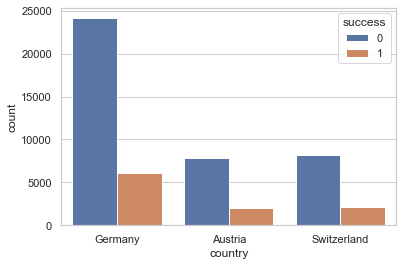

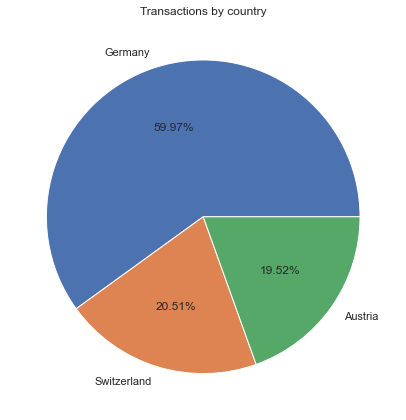

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

transactions_by_PSP = transactions.groupby('country')['country'].agg(['count']).sort_values(by='count',ascending=False).reset_index()

sns.countplot(data=transactions, x="country", hue="success")

success_rate_by_PSP =  transactions.pivot_table(values="success",index="country").reset_index()
success_rate_by_PSP['percent'] = (success_rate_by_PSP['success'] * 100).round(2)
success_rate_by_PSP = success_rate_by_PSP.sort_values(by='percent',ascending=False)

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(transactions_by_PSP['count'],labels=transactions_by_PSP['country'], autopct='%.2f%%')
ax.set_title('Transactions by country')
plt.tight_layout()

summary = pd.merge(transactions_by_PSP, success_rate_by_PSP, on="country", how="inner")
display(summary)

<h4>2.4.1.2 Transactions and success rate by PSP</h4>

52.49% of the transacions are from UK_Card, 24.69% are from Simplecard, 19.43% from Moneycard and 15.81% from Simplecard.

Goldcard have higest success rate: around 40.62%, Simplecard with 15.81% smaller rate. From the correlaction matrix we can see that there is a moderate negative relationship between number of transactions and success rate.

,PSP,count,success,percent
0,UK_Card,26459,0.194338,19.43
1,Simplecard,12446,0.158123,15.81
2,Moneycard,8297,0.218754,21.88
3,Goldcard,3208,0.406172,40.62


,count,percent
count,1.000000,-0.630477
percent,-0.630477,1.000000


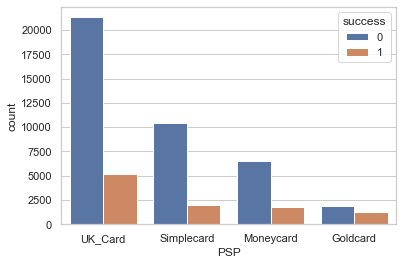

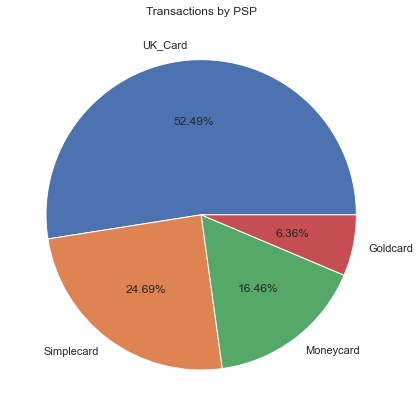

In [159]:
transactions_by_PSP = transactions.groupby('PSP')['PSP'].agg(['count']).sort_values(by='count',ascending=False).reset_index()

success_rate_by_PSP =  transactions.pivot_table(values="success",index="PSP").reset_index()
success_rate_by_PSP['percent'] = (success_rate_by_PSP['success'] * 100).round(2)
success_rate_by_PSP = success_rate_by_PSP.sort_values(by='percent',ascending=False)

summary = pd.merge(transactions_by_PSP, success_rate_by_PSP, on="PSP", how="inner")
display(summary)
display(summary[['count','percent']].corr())

sns.countplot(data=transactions, x="PSP", hue="success")

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(transactions_by_PSP['count'],labels=transactions_by_PSP['PSP'], autopct='%.2f%%')
ax.set_title('Transactions by PSP')
plt.tight_layout()

<h4>2.4.1.3 Transactions and success rate by 3D seccured</h4>

76.17% of the transacions doesn't have 3D secured customer. The transaction that have 3D secured customer have larger success rate 24.55% in comparison to others with success rate of 18.96%. 

,3D_secured,count,success,percent
0,0,38399,0.189562,18.96
1,1,12011,0.245525,24.55


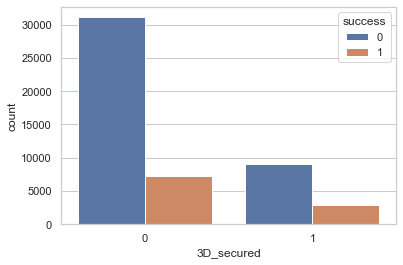

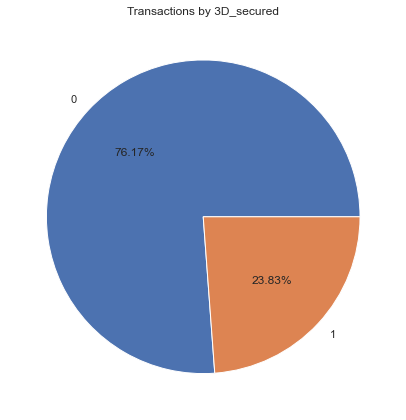

In [157]:
transactions_by_3D_secured = transactions.groupby('3D_secured')['3D_secured'].agg(['count']).sort_values(by='count',ascending=False).reset_index()

success_rate_by_3D_secured =  transactions.pivot_table(values="success",index="3D_secured").reset_index()
success_rate_by_3D_secured['percent'] = (success_rate_by_3D_secured['success'] * 100).round(2)
success_rate_by_3D_secured = success_rate_by_3D_secured.sort_values(by='percent',ascending=False)

summary = pd.merge(transactions_by_3D_secured, success_rate_by_3D_secured, on="3D_secured", how="inner")
display(summary)

sns.countplot(data=transactions, x="3D_secured", hue="success")

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(transactions_by_3D_secured['count'],labels=transactions_by_3D_secured.index, autopct='%.2f%%')
ax.set_title('Transactions by 3D_secured')
plt.tight_layout()

<h4>2.4.1.4 Transactions and success rate by card</h4>

57.53% of the transacions are done with Master, 23.09% Visa and 19.38% Dinners. There is no significant variation between success rates (low 19.39%, high 22.03%).

,card,count,success,percent
0,Master,29002,0.193883,19.39
1,Visa,11640,0.208505,20.85
2,Diners,9768,0.222973,22.30


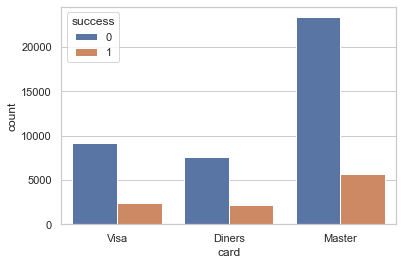

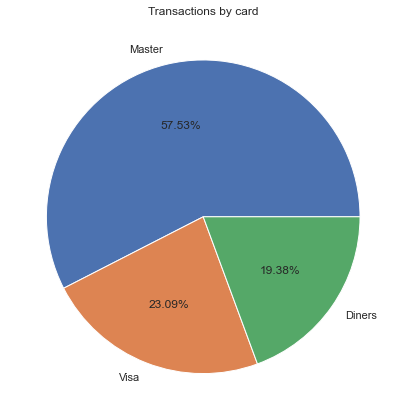

In [163]:
transactions_by_card = transactions.groupby('card')['card'].agg(['count']).sort_values(by='count',ascending=False).reset_index()

success_rate_by_card =  transactions.pivot_table(values="success",index="card").reset_index()
success_rate_by_card['percent'] = (success_rate_by_card['success'] * 100).round(2)
success_rate_by_card = success_rate_by_card.sort_values(by='percent',ascending=False)

summary = pd.merge(transactions_by_card, success_rate_by_card, on="card", how="inner")
display(summary)

sns.countplot(data=transactions, x="card", hue="success")

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(transactions_by_card['count'],labels=transactions_by_card['card'], autopct='%.2f%%')
ax.set_title('Transactions by card')
plt.tight_layout()

<h3>2.4.2  Numerical Features </h3>

Check the distribution of the amount.
Normal distributions have a skewness near 0 and a kurtosis near 3. Perform a Shapiro-Wilk Test in Python.

Null hypothesis of normality is rejected. The amount is not normaly distributed. This can pose a problem when modelling as most machine learning models require features to be normally distributed. Thus, we will perform StandardScaler() before using these features in our modelling.

count    50410.000000
mean       202.395715
std         96.274730
min          6.000000
25%        133.000000
50%        201.000000
75%        269.000000
max        630.000000
var       9268.823668
skew         0.188699
kurt        -0.335808
Name: amount, dtype: float64

Null hypothesis of normality is rejected.


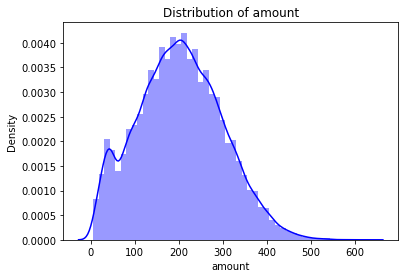

In [39]:
import warnings
warnings.filterwarnings("ignore")

sns.distplot(transactions['amount'], color='blue')
plt.title(f'Distribution of amount')

stats = transactions['amount'].describe()
stats.loc['var'] = transactions['amount'].var()
stats.loc['skew'] = transactions['amount'].skew()
stats.loc['kurt'] = transactions['amount'].kurtosis()
display(stats)

from scipy import stats
p_value = stats.shapiro(transactions['amount'])[1]

#Shapiro-Wilk Test in Python
if p_value <= 0.05:
    print("Null hypothesis of normality is rejected.")
else:
    print("Null hypothesis of normality is accepted.")

<h3>2.4.3 Target variable</h3>

From the above, we see huge class imbalance in the target variable. i.e., Only approximately 15% of the transactions are succesfull.

Thus, we must take care of this in the modelling (e.g., apply re-sampling technique) and ensure that huge class imbalance do not negatively impact our modelling performance.

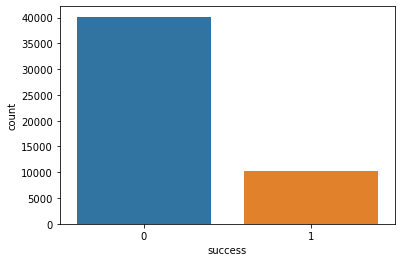

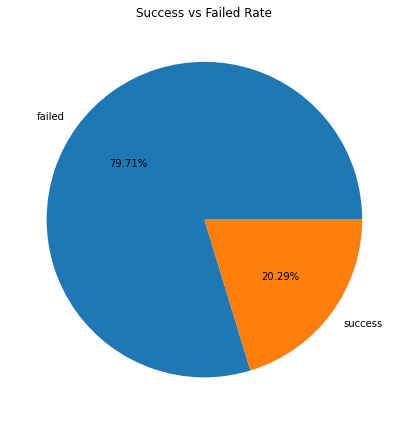

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=transactions, x="success")

fig, ax = plt.subplots(figsize=(6, 6))
rates = transactions.groupby('success')['success'].agg(['count'])
ax.pie(rates['count'], labels=['failed','success'], autopct='%.2f%%')
ax.set_title('Success vs Failed Rate')
plt.tight_layout()

<h1>3. Data Preparation</h1>

After you understand the data you have, it is time for the Data Preparation. This phase is what we did to prepare the data for the modeling phase. 

<h2>3.1 Data Selection</h2>

<h2>3.2 Data Cleaning</h2>

<h2>3.3 Feature Engineering</h2>

<h2>3.4 Data Integration</h2>

<h2>3.5 Data Formatting</h2>